# MSBD566 - Lecture 3
## Exploratory Data Analysis Example: Diabetes

Data source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

#### Import modules and dataset

In [19]:
# modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set tables to display 100 columns and 100 rows
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [20]:
# dataset
# edit as needed to load your dataset
data = pd.read_csv('/Users/sravanphanikumarkopparthi/Documents/PHD/MSDB-566/Code/MSBD566-sampleRepo/diabetic_data.csv')

# ID maps
feature_map = pd.read_csv('/Users/sravanphanikumarkopparthi/Documents/PHD/MSDB-566/Code/MSBD566-sampleRepo/IDS_mapping.csv', header=None)

admissionType = dict(zip(feature_map[0][1:9], feature_map[1][1:9]))
dischargeDisposition = dict(zip(feature_map[0][11:41], feature_map[1][11:41]))
admissionSource = dict(zip(feature_map[0][43:68], feature_map[1][43:68]))

# change ID to numbers
admissionType = {int(key): value for key, value in admissionType.items()}
dischargeDisposition = {int(key): value for key, value in dischargeDisposition.items()}
admissionSource = {int(key): value for key, value in admissionSource.items()}
#display(admissionSource)

#### Explore the data

In [21]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [22]:
# DATA CLEANING
# remove columns with question marks
data = data.drop(columns=['weight', 'payer_code', 'medical_specialty'])

# remove Q-marks and empty cells with nan
clean_data = data.replace('?', np.nan)
clean_data = clean_data.replace(' ', np.nan)

# align map with the data
clean_data['admission_type_id'] = clean_data['admission_type_id'].map(admissionType)
clean_data['discharge_disposition_id'] = clean_data['discharge_disposition_id'].map(dischargeDisposition)
clean_data['admission_source_id'] = clean_data['admission_source_id'].map(admissionSource)

# check the data again
clean_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [23]:
# checking the number of original patients
original_shape = clean_data.shape
print(f'Original data shape: {original_shape}')

# remove rows with NaNs
clean_data = clean_data.dropna(how='any', axis=0)
print(f'New data shape: {clean_data.shape}')
print(f'Number of rows removed: {original_shape[0] - clean_data.shape[0]}')

# remove columns with NaNs - if needed
clean_data = clean_data.dropna(how='any', axis=1)
print(f'New data shape: {clean_data.shape}')
print(f'Number of columns removed: {original_shape[1] - clean_data.shape[1]}')

# Note: We don't need to remove NaNs if we don't care about the columns with NaNs.

Original data shape: (101766, 47)
New data shape: (58, 47)
Number of rows removed: 101708
New data shape: (58, 47)
Number of columns removed: 0


**Explore data - scatter plot**

<Axes: xlabel='num_lab_procedures', ylabel='num_medications'>

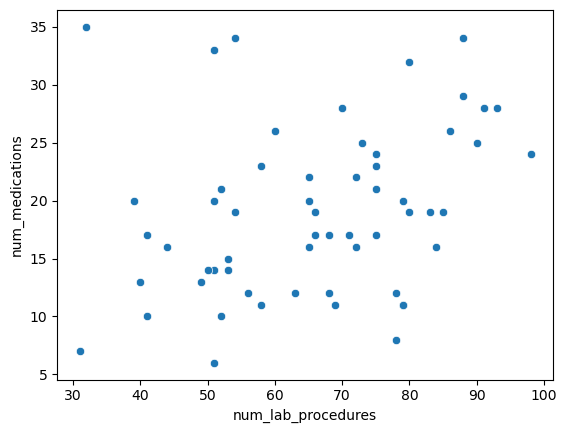

In [24]:
sns.scatterplot(data=clean_data, x='num_lab_procedures', y='num_medications')

Genders: ['Female' 'Male']


(array([31., 27.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

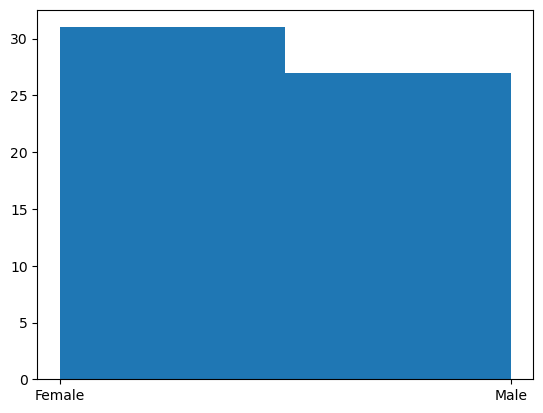

In [25]:
# histogram of genders 
gender_types = clean_data['gender'].unique()
print(f"Genders: {gender_types}")
plt.hist(clean_data['gender'], bins=2)

**Explore data - counts and uniques**

In [26]:
# count how many unique values in the column
clean_data['metformin'].nunique()

3

In [27]:
# count how many are the patients have metmorfine
clean_data['metformin'].value_counts()

metformin
No        44
Steady    12
Up         2
Name: count, dtype: int64

In [28]:
# find all the races used in the dataset
clean_data['race'].unique()

array(['Caucasian', 'AfricanAmerican'], dtype=object)

In [29]:
# find total participants in the dataset
total_rows = clean_data.shape[0]
print(f'Total rows: {total_rows}')

Total rows: 58


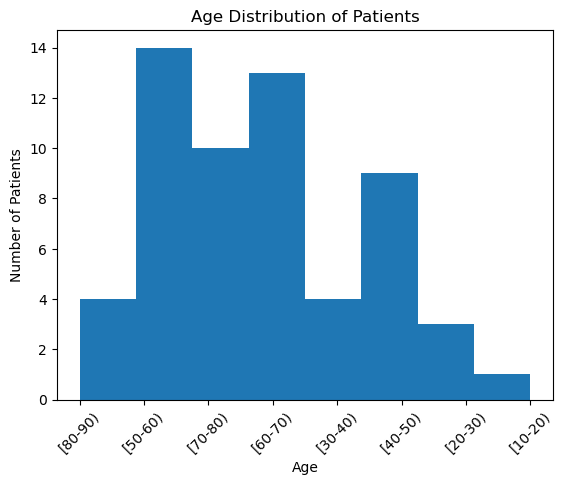

Percentage of patients between 40-60 years old: 39.66%
Percentage of patients between 70-80 years old: 17.24%


In [30]:
# Example 1: Age distribution
# What is the distribution of age in the dataset?
num_age = clean_data['age'].nunique()
plt.hist(clean_data['age'], bins=num_age)
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
plt.show()

# finding percentage of patients between 40-60 years old
Nage_40_50 = (clean_data[(clean_data['age'] == '[40-50)') | (clean_data['age'] == '[50-60)')]).shape[0]
percentage_40_50 = (Nage_40_50 / total_rows) * 100
print(f'Percentage of patients between 40-60 years old: {percentage_40_50:.2f}%')

# find percentage of patients between 70-80 years old
Nage_70_80 = (clean_data[(clean_data['age'] == '[70-80)')]).shape[0]
percentage_70_80 = (Nage_70_80 / total_rows) * 100
print(f'Percentage of patients between 70-80 years old: {percentage_70_80:.2f}%')

In [31]:
# Example 2: Race distribution
# What is the distribution of races in the dataset?
race_counts = clean_data['race'].value_counts()
display(race_counts)

# How many patients are of each race?
for race in race_counts.index:
    percent = race_counts[race]/total_rows * 100
    print(f'Percentage of patients who are {race}: \t{percent:.2f}%')

race
Caucasian          48
AfricanAmerican    10
Name: count, dtype: int64

Percentage of patients who are Caucasian: 	82.76%
Percentage of patients who are AfricanAmerican: 	17.24%


**Group: Data Exploration**

In [32]:
# Number of medications given to patients by race - use groupby()
num_meds = clean_data.groupby('race')['num_medications'].sum().reset_index()
num_meds

,race,num_medications
0,AfricanAmerican,145
1,Caucasian,958


In [33]:
# Number of No metamorfine patients - use groupby()
no_metformin_counts = clean_data[clean_data['metformin'] == 'No'].groupby('race').size().reset_index(name='No Metformin Count')
display(no_metformin_counts)

# combine with number of medications - use merge()
metmorfin_per_race = no_metformin_counts.merge(num_meds, on='race')
display(metmorfin_per_race)


,race,No Metformin Count
0,AfricanAmerican,7
1,Caucasian,37


,race,No Metformin Count,num_medications
0,AfricanAmerican,7,145
1,Caucasian,37,958


### Activity

In [34]:
# Question 1: What is the distribution of diabetes medications among different races? Give in percentages. 

In [35]:
# Question 2: How many female patients are not prescribed with insulin? What is the percentage over the total patients?

In [36]:
# Question 3: Is there any correlation between number of lab procedures and number of medications? Look at the scatter plot above and find the correlation coefficient.